In [59]:
# Bibliotecas

import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [60]:
pasta = "imagens"
treino_split, val_split = 0.7, 0.15

# Listando todas as categorias (subdiretórios) na pasta raiz
categorias = [x[0] for x in os.walk(pasta) if x[0]][1:]
#print(categorias)

In [61]:
# Função auxiliar para carregas a imagem e retorná-la e o vetor de entrada
def obter_imagem(caminho):
    img = image.load_img(caminho, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carregando as imagens da pasta raiz

In [62]:
dados = []

for valor, categoria in enumerate(categorias):
    imagens = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(categoria) for f in filenames
              if os.path.splitext(f)[1].lower() in [".jpg", ".png", ".jpeg"]]
    for cont, img_path in enumerate(imagens):
        try:
            img, x = obter_imagem(img_path)
            frase_imagem = f"{cont}º imagem"
            print(frase_imagem)

            try:
                dados.append({"x":np.array(x[0]), "y":valor})
            except Exception as e:
                print(f"Erro: {e}")
        
        except Exception as erro:
            print(f"Erro: {erro}")

# contando o número de classes
num_classes = len(categorias)
#print(num_classes)

0º imagem
1º imagem
2º imagem
3º imagem
4º imagem
5º imagem
6º imagem
7º imagem
8º imagem
9º imagem
10º imagem
11º imagem
12º imagem
13º imagem
14º imagem
15º imagem
16º imagem
17º imagem
18º imagem
19º imagem
20º imagem
21º imagem
22º imagem
23º imagem
24º imagem
25º imagem
26º imagem
27º imagem
28º imagem
29º imagem
30º imagem
31º imagem
32º imagem
33º imagem
34º imagem
35º imagem
0º imagem
1º imagem
2º imagem
3º imagem
4º imagem
5º imagem
6º imagem
7º imagem
8º imagem
9º imagem
10º imagem
11º imagem
12º imagem
13º imagem
14º imagem
15º imagem
16º imagem
17º imagem
18º imagem
19º imagem
20º imagem
21º imagem
22º imagem
23º imagem
24º imagem
25º imagem
26º imagem
27º imagem
28º imagem
29º imagem
30º imagem
31º imagem
32º imagem
33º imagem
34º imagem
35º imagem
36º imagem
37º imagem
38º imagem
39º imagem
40º imagem
41º imagem
42º imagem
43º imagem
44º imagem
45º imagem
46º imagem
47º imagem
48º imagem
49º imagem
50º imagem
51º imagem
52º imagem
53º imagem
54º imagem
55º imagem
56º imag

Randomizando a ordem dos dados

In [63]:
random.shuffle(dados) # Boa prática, para dividir treino, validação e teste (embaralhamento)

Criando divisão dos dados treinamento = 70%, validação = 15%, teste = 15%

In [64]:
idx_val = int(treino_split * len(dados))
idx_test = int((treino_split + val_split) * len(dados))
treino = dados[:idx_val]
validacao = dados[idx_val:idx_test]
teste = dados[idx_test:]

print(f"Tamanho dos dados de treino {len(treino)}")
print(f"Tamanho dos dados de validação {len(validacao)}")
print(f"Tamanho dos dados de teste {len(teste)}")

Tamanho dos dados de treino 77
Tamanho dos dados de validação 17
Tamanho dos dados de teste 17


Dados separados por rótulos

In [65]:
# Separando as entradas e rótulos para o conjunto de treino
x_treino = np.array([t["x"] for t in treino])
y_treino = [t["y"] for t in treino]

# Separando as entradas e rótulos para o conjunto de validação
x_validacao = np.array([v["x"] for v in validacao])
y_validacao = [v["y"] for v in validacao]

# Separando as entradas e rótulos para o conjunto de teste
x_teste = np.array([t["x"] for t in teste])
y_teste = [t["y"] for t in teste]

#print(y_teste)

Pré-processando os dados, certificando que sejam float32 e normalizando entre 0 e 1

In [66]:
# Normalizando os dados
x_treino = x_treino.astype("float32") / 255
x_validacao = x_validacao.astype("float32") / 255
x_teste = x_teste.astype("float32") / 255

# Convertendo rótulos em One-hot
y_treino = keras.utils.to_categorical(y_treino, num_classes)
y_validacao = keras.utils.to_categorical(y_validacao, num_classes)
y_teste = keras.utils.to_categorical(y_teste, num_classes)
#print(y_teste.shape)

Resumo dos dados

In [67]:
# Resumo
print(f"Carregado {len(dados)} imagens e {num_classes} categorias")
print(f"Dados de treino = {len(x_treino)} / validação = {len(x_validacao)} / teste = {len(x_teste)}")
print(f"Forma dados de treinamento: {x_treino.shape}")
print(f"Forma rótulos de treinamento: {y_treino.shape}")

Carregado 111 imagens e 2 categorias
Dados de treino = 77 / validação = 17 / teste = 17
Forma dados de treinamento: (77, 224, 224, 3)
Forma rótulos de treinamento: (77, 2)


Visualizando alguns dados

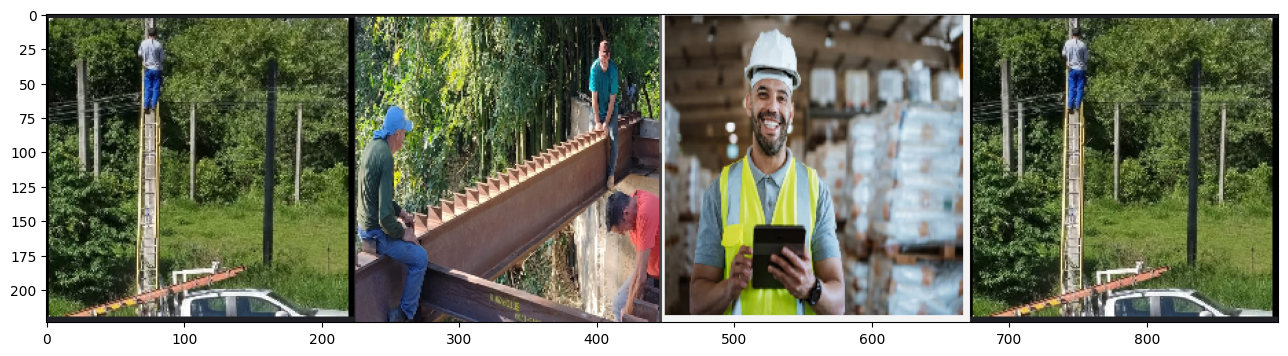

In [68]:
imagens = [os.path.join(dp, f) for dp, dn, filenames in os.walk(pasta) for f in filenames if os.path.splitext(f)[1].lower() in [".jpg", ".png", ".jpeg"]]
idx = [int(len(imagens) * random.random()) for i in range(4)]
imgs = [image.load_img(imagens[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16, 4))
plt.imshow(concat_image)

Carregando o modelo do keras

In [69]:
vgg = keras.applications.VGG16(weights="imagenet", include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [70]:
inp = vgg.input # Referência a camada de entraada VGG
new_classification_layer = Dense(num_classes, activation="softmax") # Criando uma nova camada softmax com num_classes neurônios
out = new_classification_layer(vgg.layers[-2].output) # Conectando a nova camada à penúltima camada do VGG e fazendo referência a ela
model = Model(inp, out) # Criando uma nova rede entre inp e out

In [71]:
# Tornando todas as camadas não treináveis, congelandos os pesos, (exceto pela última camada)
for l, layer in enumerate(model.layers[:-1]):
    layer.trainable = False

# Garantindo que última camada não seja treinada
for l, layer in enumerate(model.layers[-1:]):
    layer.trainable = True

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [72]:
history = model.fit(x_treino, y_treino,
                    batch_size=8,
                    epochs = 10,
                    validation_data=(x_validacao, y_validacao))

Epoch 1/10


10/10 [==============================] - 17s 2s/step - loss: 0.5625 - accuracy: 0.7403 - val_loss: 0.3609 - val_accuracy: 0.7647
Epoch 2/10
10/10 [==============================] - 15s 2s/step - loss: 0.1481 - accuracy: 0.9740 - val_loss: 0.1170 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 15s 2s/step - loss: 0.0534 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 15s 2s/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 8/10
10/10 [

(0.0, 1.0)

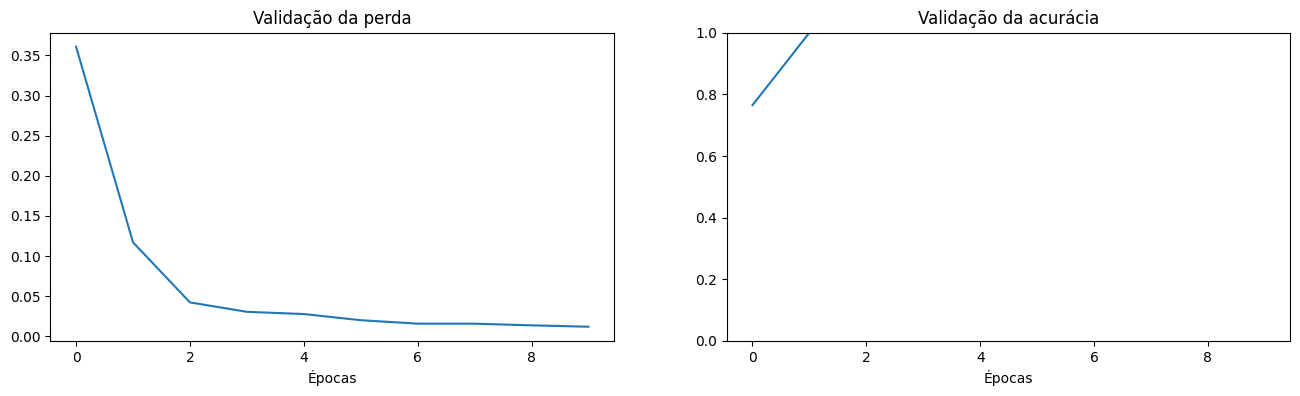

In [76]:
fig = plt.figure(figsize=(16, 4))

ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("Validação da perda")
ax.set_xlabel("Épocas")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("Validação da acurácia")
ax2.set_xlabel("Épocas")
ax2.set_ylim(0,1)

In [79]:
perda, acuracia = model.evaluate(x_teste, y_teste, verbose=0)
print("Teste de perda: ", perda)
print("Teste de acurácia: ", acuracia)

Teste de perda:  0.012416351586580276
Teste de acurácia:  1.0


Aplicando modelo a uma imagem

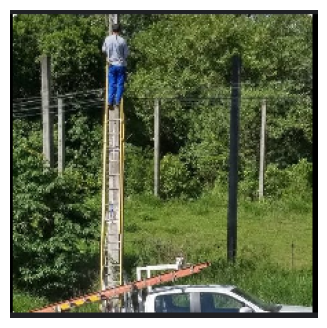

1/1 [==============================] - 0s 235ms/step
Probabilidade de ser a classe 0 (correto): 0.5562674254179001
Probabilidade de ser a classe 1 (errado): 99.44373369216919


In [91]:
img, x = obter_imagem(f"{pasta}/uso_epi_falha/2.png")

# Mostrar imagem
plt.figure(figsize=(16, 4))
plt.imshow(img)
plt.axis("off")
plt.show()

probabilidade = model.predict([x])
probabilidade = probabilidade[0]

print(f"Probabilidade de ser a classe 0 (correto): {probabilidade[0] * 100}")
print(f"Probabilidade de ser a classe 1 (errado): {probabilidade[1] * 100}")